# Traditional methods for ML in Graphs

The traditional ML pipeline for graph is designing features (by hand) from data which describe how a given node is positioned in the graph, its local topology, and significance. These tasks can be generalised to "Given $G=(V,E)$, learn a function $f:V\rightarrow\mathbb{R}$, $f:E\rightarrow\mathbb{R}$, or $f:G\rightarrow\mathbb{R}$"

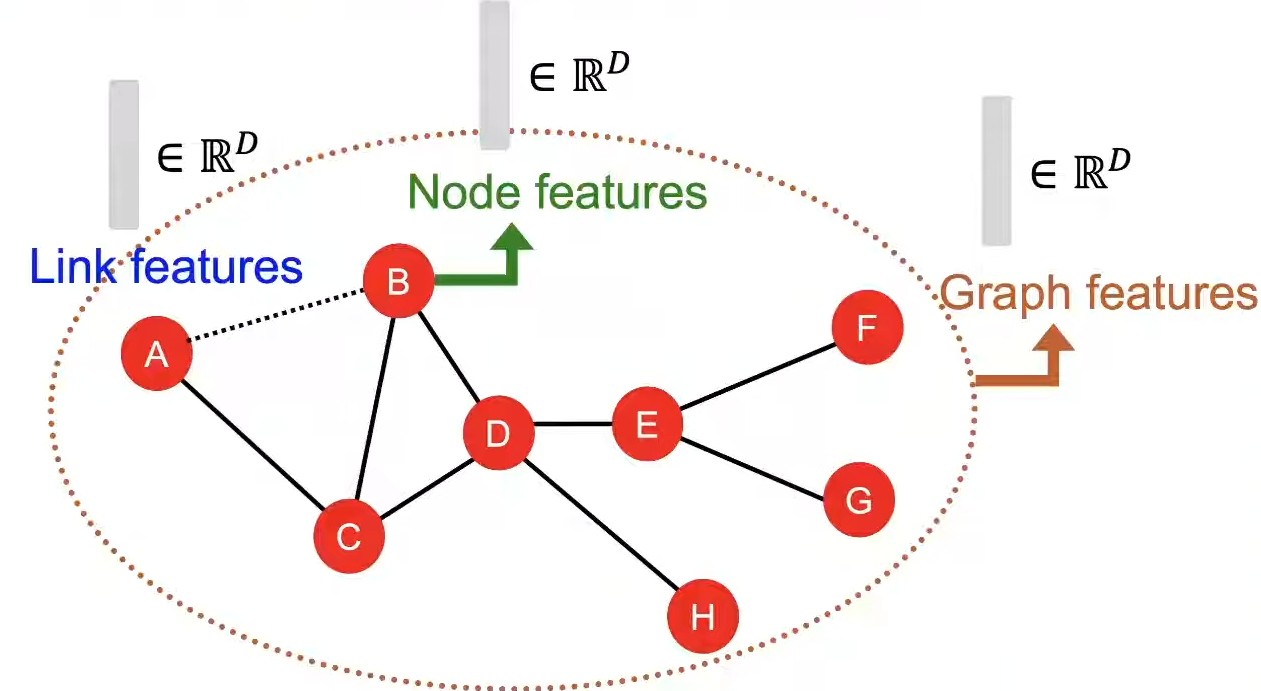

## Node Level Tasks
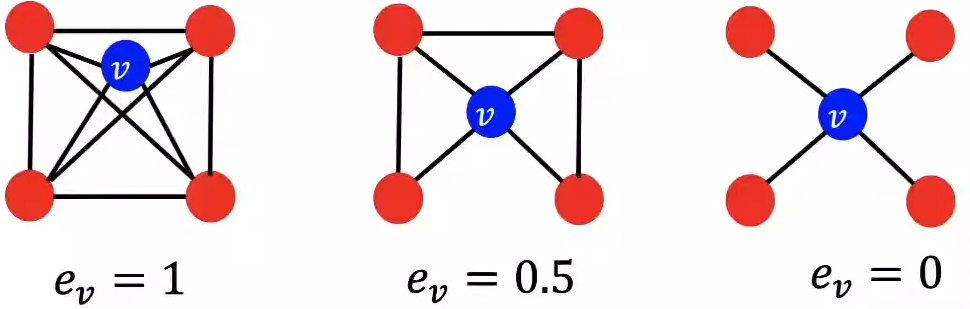

For creating node-level features, the overall task can be thought of as a semi-supervised method where the grey nodes need to be coloured in; and so the goal is to characterize the structure and position of a node in a network to aid in this task.

### Node degree
The simplest feature to design is the number of edges each node has, $d$, capturing the number of neighbours each node has treating each neighbour equally (nodes with equal degree are indistinguishable even if at opposite sides of the network).
### Node Centrality
This feature type attempts to capture the "importance" $c_v$ of a given node $v$ to its graph:
#### Egienvector Centrality
In here, "importance" of a node $v$ is defined by the importance of the neighbouring nodes $u\in N(v)$. This idea can be written as $c_v=\frac{1}{\lambda}\sum_{u\in N(v)}c_u$ for some positive constant $\lambda$, which can be clearly represented in marix form as $\lambda c=Ac$ where $A$ is the adjacency matrix ($A_{uv}=1$ if $u\in N(v)$), and $c$ is the centrality vector ($1\times |V|$ vector) whose $i^{th}$ element corresponds to node $i$'s importance, $c_i$. In this form it can be seen that this is an eigenvector eigenvalue equation
- Perron-Frobenius theorem of linear algebra says that, for every irreducible non-negative matrix, its largest eigenvalue ($\lambda_{max}$) is positive, and the components of the corresponding eigenvector ($c_{max}$) are also all positive.Therefore, for any strongly connected directed network (needs only to be connected if undirected), the centrality vector is well-defined.

    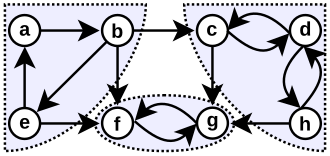 (strongly connected components of a graph)

#### Betweennes Centrality
A different interpretation of "importance", where a node is important if it lies on many **shortest paths** between other nodes (if it is a transit point or big point of failure):$$c_v=\sum_{s\neq v\neq t}\frac{\#(\text{shortest paths between }s\text{ and }t\text{ that contain }v)}{\#(\text{shortest paths between }s\text{ and }t)}$$

#### Closeness Centrality
Similar to betweenness, this feature captures the "importance" of a node based on the length of the sortest paths from itself to all other nodes (if it is close to everyone else):$$c_v=\sum_{u\neq v}\frac{1}{\text{shortest path between }u\text{ and }v}$$
#### Clustering Coefficient
This measure of centrality, instead of looking at the node itself, measures how connected $v$'s neighbouring nodes are to each-other:$$e_v=\frac{\#(\text{edges among neighbouring nodes})}{\binom{d_v}{2}}$$
<table><tr><td>

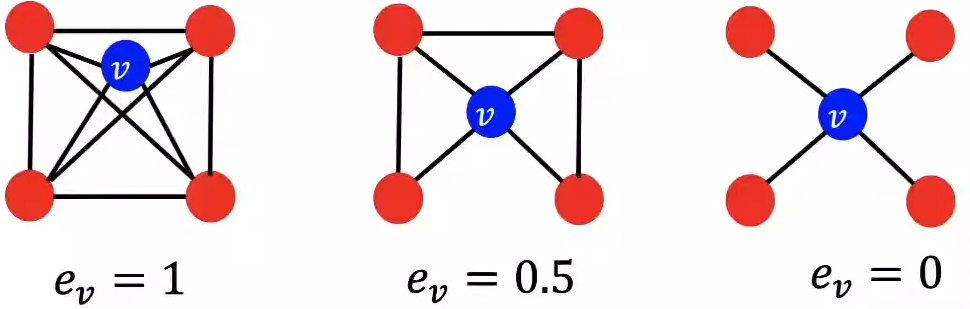

(example of clustering coefficients)
</td><td>

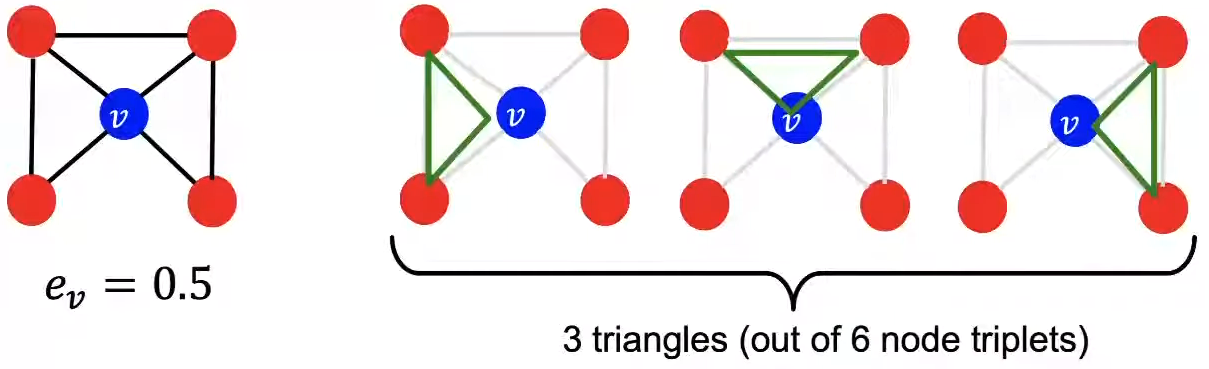

This can be thought of as counting the number of triangles in the *ego-network* (the subnetwork consisting of the given node and its neighbours)
</td></tr></table>

##### Graphlets
Generalising the observation made about the clustering coefficient to instead of looking only at triangles but expand it to **rooted connected non-isomorphic subgraphs**, also known as *graphlets*: (numbered nodes are the **node of interest**) 

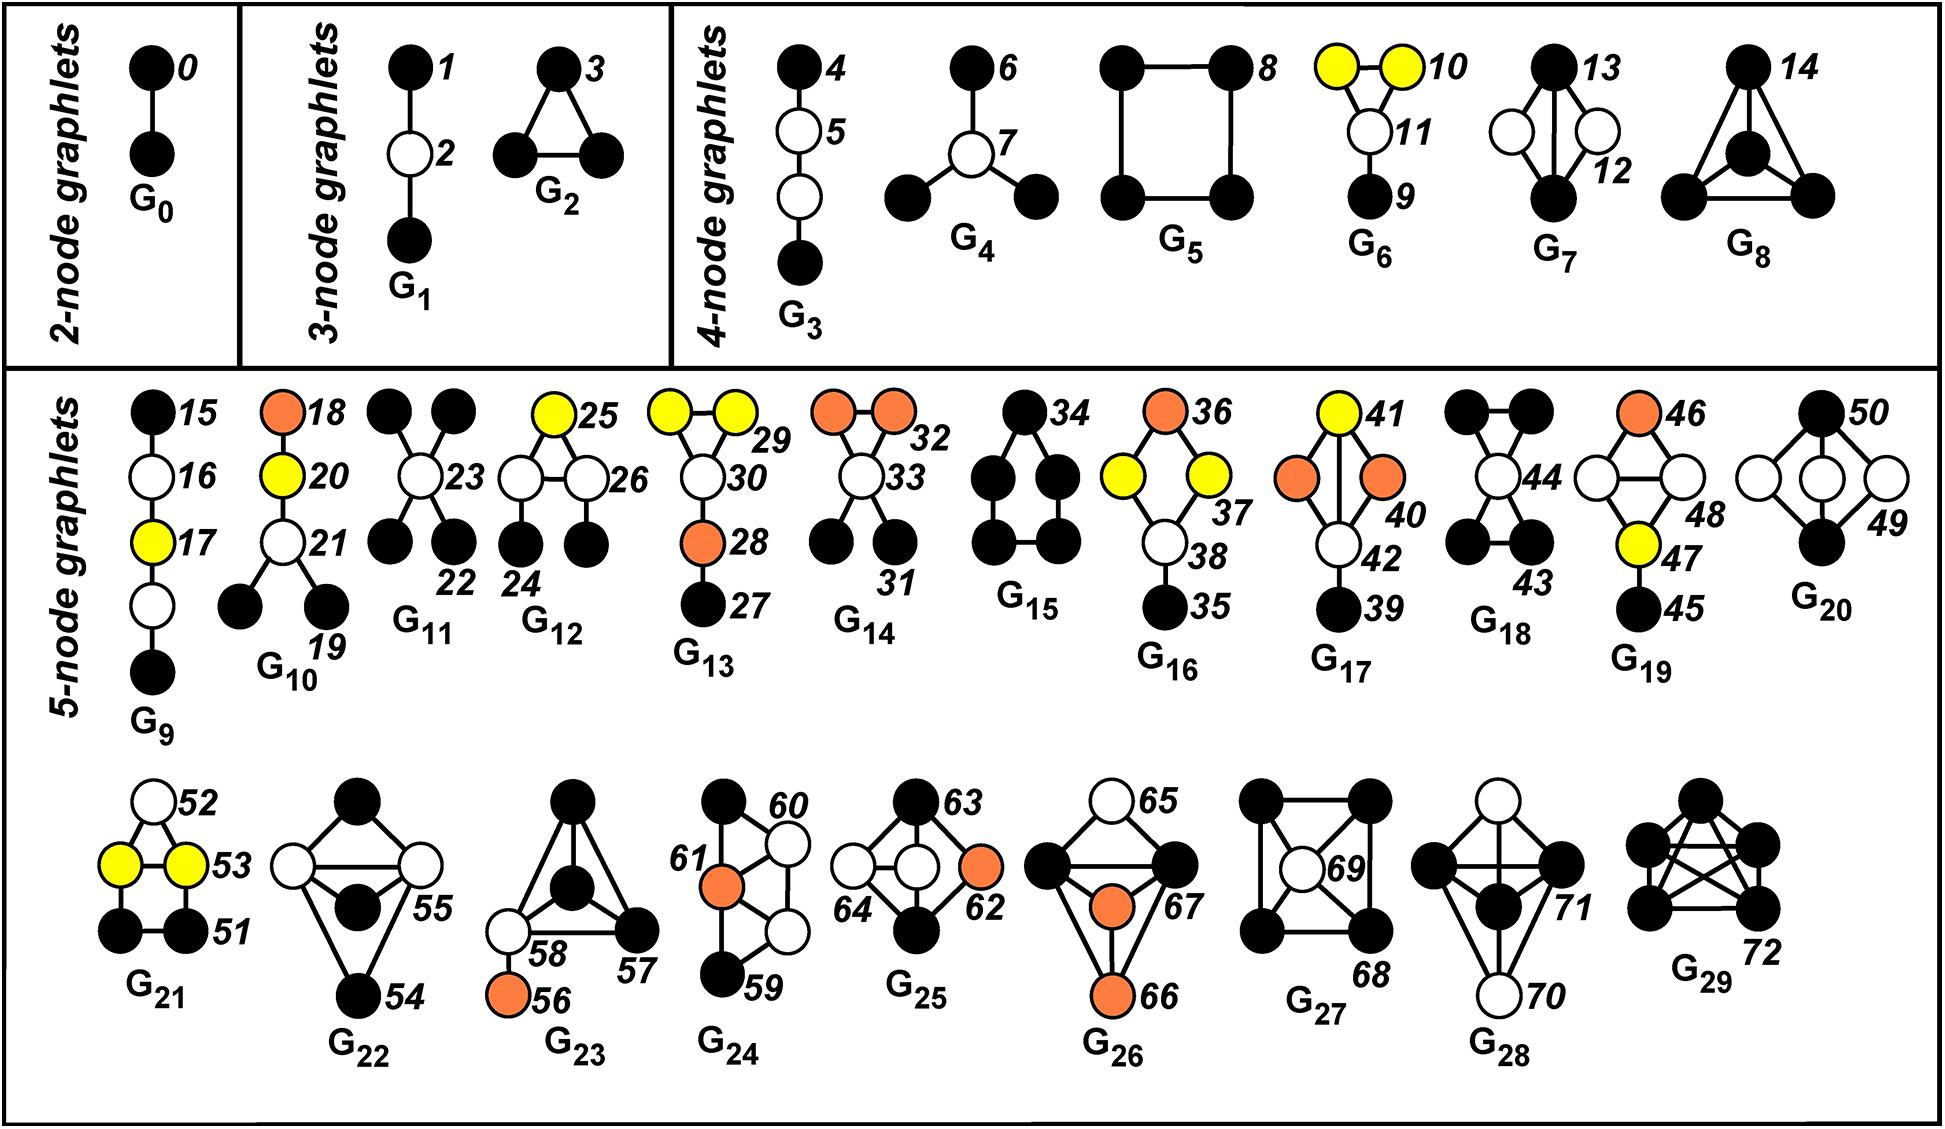

Using these, a **Graphlet Degree Vector** (GDV) can be generated for every node, where the $i^{th}$ element is the number of graphlets the node participates in as the *node of interest* $i$. This then provides a more detailed measure of local topology of the graph (more computationally intensive).

## Edge Level Tasks
For creating edge-level features, the overall task can be thought of predicting new links based on existing ones; at test time all node pairs are ranked and the top $K$ links are predicted. The goal is then to design features for a pair of nodes which has 2 main formulations:
1. remove a random set of links and then aim to predict them back.
2. given a graph of edges up to time $t_0'$, $G[t_0,t_0']$, output a ranked list $L$ of links not in $G[t_0,t_0']$ that are predicted to appear in $G[t_1,t_1']$. This can be evaluated by taking the top $n=|E_{new}|$ (number of edges that appear during the period $[t_1,t_1']$) of $L$ and count the number of correctly predcted edges.

The methodology will then be that for each pair of nodes $(x,y)$ a score $c(x,y)$ will be computed and sorted in decreasing order, with the top $n$ pair predicted as the new links and tested against $G[t_1,t_1']$

### Distance-based Features
The simplest of these features is capturing the sortest-path distance between node $u$ and $v$. However, this does not record "**neighbourhood overlap**", where 2 are not "close" to each other but their neighbourhood is very connected,
### Local neighbourhood Features
This class of features attempts to fix distance-based features' shortcomings by capturing the number of neighbouring nodes shared between nodes $v_1$ and $v_2$, thereby calculate the degree of neighbourhood overlap:

<table><tr><td>

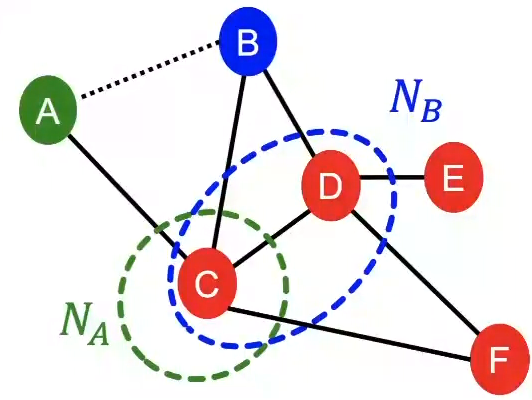
</td><td>

#### Common Neighbours
$$|N(v_1)\cap N(v_2)|$$
#### Jaccard's Coefficient
$$\frac{|N(v_1)\cap N(v_2)|}{|N(v_1)\cup N(v_2)|}$$
attempts to normalise *common neighbours*
#### Adamic-Adar Index
$$\sum_{u\in N(v_1)\cap N(v_2)}\frac{1}{\log{d_u}}$$
</td></tr></table>
The limit with this is that it is always 0 is the two nodes do not have any neighbours in common, even if the nodes may still potentially be connected in the future. 

### Global neighbourhood Features
This feature resolves the limitation introduced by local neighbourhood features by considering the entire graph. This can be achieved using **Kantz Index**.

Adjancency matrix $A$ has $A_{uv}=1$ if $u\in N(v)$ and so can be thought of as the number of paths between the nodes of length 1 (direct neighbourhood), $P_{uv}^{(1)}$. Therefore, $P_{uv}^{(k)}=\sum_i A_{ui}P_{iv}^{(k-1)}=A_{ui}A_{iv}^{k-1}=A_{uv}^k$.

Kantz Index, $s_{v_1v_2}=\sum_{l=1}^\infty\beta^lA_{v_1v_2}^l,\;0<\beta<1$ (discount factor), then counts the number of paths of all lengths between a pair of nodes; applying a bias towards shorter paths due to the discount factor. This has a closed form ($\sum_{i=0}^\infty\beta^iA^i=(I-\beta A)^{-1}$ by geometric series of matrices) $$S=\sum_{i=1}^\infty\beta^iA^i=(I-\beta A)^{-1}-I$$